In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CLEANING AND PREPROCESSING

In [8]:
patient=pd.read_csv(r'C:\Users\pvans\Downloads\HDHI Admission data.csv')
name=pd.read_csv(r'C:\Users\pvans\Downloads\Master Data.csv')

In [9]:
#replace name data column Admission Num with Admission No to use same column to merge two csv
name = name.rename(columns={'Admission Num':'Admission No'})

In [10]:
patient=pd.merge(patient, name,on='Admission No',how='inner')

In [11]:
patient.drop(['Admission No','PRIOR CMP','CKD','BNP','SEVERE ANAEMIA','STEMI','ATYPICAL CHEST PAIN','VALVULAR','CHB','SSS','CVA INFRACT','CVA BLEED','AF','VT','PSVT','CONGENITAL','UTI','NEURO CARDIOGENIC SYNCOPE','INFECTIVE ENDOCARDITIS','DVT','CARDIOGENIC SHOCK','SHOCK','PULMONARY EMBOLISM','CHEST INFECTION','ORTHOSTATIC','Name'],axis=1,inplace=True)

In [12]:
patient= patient.dropna(subset=['EF'])

In [13]:
patient.loc[patient['HB']=='', 'HB']=0

In [14]:
columns = ['HB', 'TLC','PLATELETS','GLUCOSE', 'UREA', 'CREATININE']

# Replace non-numeric values with NaN in specified columns
for column in columns:
    patient[column] = pd.to_numeric(patient[column], errors='coerce')

# Calculate the means of specified columns
means = patient[columns].mean()

# Fill null and NaN values with column-wise means
patient[columns] = patient[columns].fillna(means)



In [15]:
#formatind date into yyyy-mm-dd format
patient['D.O.A'] = pd.to_datetime(patient['D.O.A'],errors='coerce')
patient['D.O.A_Formatted'] = patient['D.O.A'].dt.strftime('%d %B %Y')
patient['D.O.D'] = pd.to_datetime(patient['D.O.D'],errors='coerce')
patient['D.O.D_Formatted'] = patient['D.O.D'].dt.strftime('%d %B %Y')

#patient['D.O.D'] = patient['D.O.D'].dt.strftime("%m/%d/%Y")

C:\Users\pvans\AppData\Local\Temp\ipykernel_17000\3415750400.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  patient['D.O.A'] = pd.to_datetime(patient['D.O.A'],errors='coerce')
C:\Users\pvans\AppData\Local\Temp\ipykernel_17000\3415750400.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  patient['D.O.D'] = pd.to_datetime(patient['D.O.D'],errors='coerce')


In [16]:
patient.drop(['D.O.A','D.O.D'],axis=1,inplace=True)
patient.head

<bound method NDFrame.head of          SNO  AGE GENDER RURAL TYPE OF ADMISSION-EMERGENCY/OPD month year  \
0          1   81      M     R                               E     Apr-17   
1          2   65      M     R                               E     Apr-17   
3       6880   53      M     U                               E     Feb-18   
4       6974   53      M     U                               E     Feb-18   
5       9509   54      M     U                               E     Jul-18   
...      ...  ...    ...   ...                             ...        ...   
15752  15753   86      F     U                               O     Mar-19   
15753  15754   50      M     R                               E     Mar-19   
15754  15755   82      M     U                               E     Mar-19   
15755  15756   59      F     U                               O     Mar-19   
15756  15757   59      F     U                               O     Mar-19   

       duration of intensive unit stay    OUT

In [17]:
patient= patient.dropna(subset=['D.O.D_Formatted'])

In [18]:
# Drop rows where 'column_name' is 'EMPTY'
patient = patient[patient['EF'] != 'EMPTY']

In [19]:
patient.isnull().sum()

SNO                                0
AGE                                0
GENDER                             0
RURAL                              0
TYPE OF ADMISSION-EMERGENCY/OPD    0
month year                         0
duration of intensive unit stay    0
OUTCOME                            0
SMOKING                            0
ALCOHOL                            0
DM                                 0
HTN                                0
CAD                                0
HB                                 0
TLC                                0
PLATELETS                          0
GLUCOSE                            0
UREA                               0
CREATININE                         0
RAISED CARDIAC ENZYMES             0
EF                                 0
ANAEMIA                            0
STABLE ANGINA                      0
ACS                                0
HEART FAILURE                      0
HFREF                              0
HFNEF                              0
A

In [278]:
patient.columns

Index(['SNO', 'AGE', 'GENDER', 'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD',
       'month year', 'duration of intensive unit stay', 'OUTCOME', 'SMOKING ',
       'ALCOHOL', 'DM', 'HTN', 'CAD', 'HB', 'TLC', 'PLATELETS', 'GLUCOSE',
       'UREA', 'CREATININE', 'RAISED CARDIAC ENZYMES', 'EF', 'ANAEMIA',
       'STABLE ANGINA', 'ACS', 'HEART FAILURE', 'HFREF', 'HFNEF', 'AKI',
       'DOCTORS NOTE', 'D.O.A_Formatted', 'D.O.D_Formatted'],
      dtype='object')

# EDA

In [12]:
#numerical features from csv
numerical=[features for features in patient.columns if patient[features].dtypes!='O']
print(len(numerical))
patient[numerical].head

22


<bound method NDFrame.head of          SNO  AGE  duration of intensive unit stay  SMOKING   ALCOHOL  DM  \
0          1   81                                2         0        0   1   
1          2   65                                2         0        1   0   
3       6880   53                                1         0        0   1   
4       6974   53                                3         0        0   1   
5       9509   54                                1         0        0   1   
...      ...  ...                              ...       ...      ...  ..   
15752  15753   86                                1         0        0   1   
15753  15754   50                                2         0        0   1   
15754  15755   82                                5         0        0   0   
15755  15756   59                                2         0        0   0   
15756  15757   59                                2         0        0   0   

       HTN  CAD    HB   TLC  ...   UREA  CREA

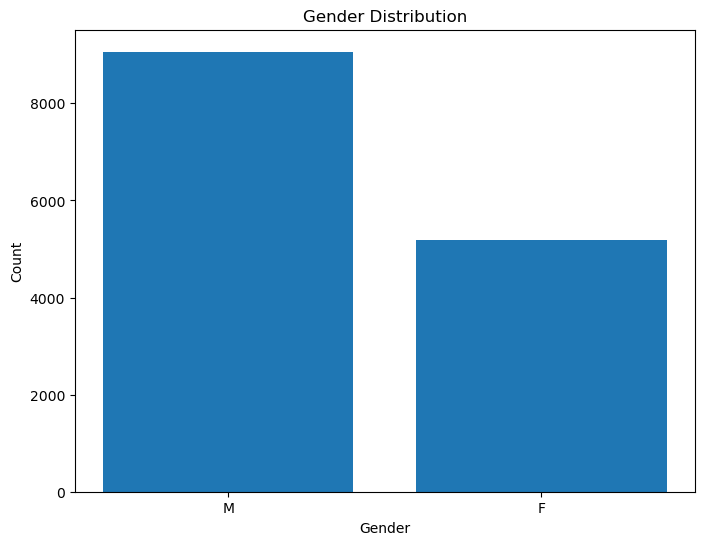

In [13]:
gender= patient['GENDER'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(gender.index, gender.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
#plt.bar(patient, 'GENDER')
#plt.title('Gender Distribution')
#plt.show()

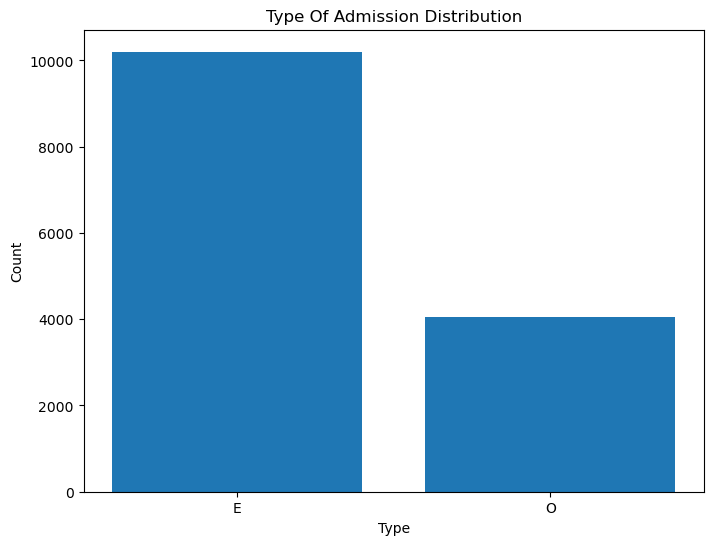

In [16]:
typeadmit= patient['TYPE OF ADMISSION-EMERGENCY/OPD'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(typeadmit.index, typeadmit.values)
plt.title('Type Of Admission Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

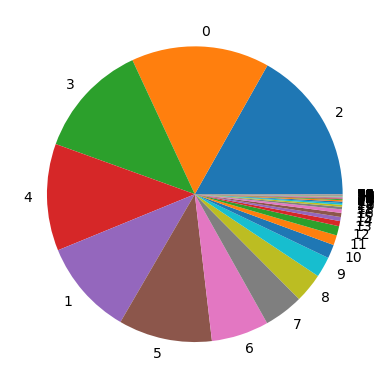

In [32]:
x = patient['duration of intensive unit stay'].value_counts()
plt.pie(x.values,
        labels=x.index)
plt.show()

Text(0.5, 1.0, 'Percip Outlier Boxplot')

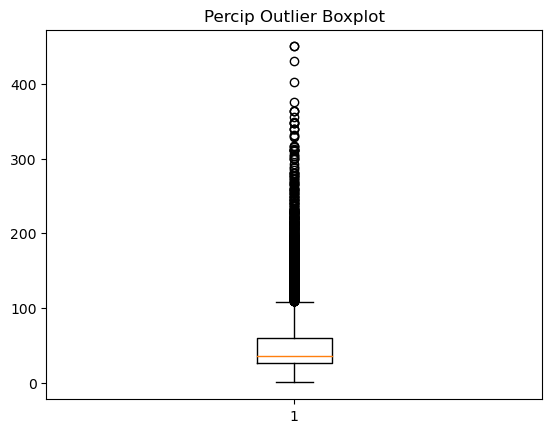

In [75]:
plt.boxplot(patient['UREA'])
plt.title('Percip Outlier Boxplot')

In [76]:
Q1 = patient['UREA'].quantile(0.25)
Q3 = patient['UREA'].quantile(0.75)
IQR = Q3 - Q1
mini = Q1 - (1.5 * IQR)
maxi = Q3 + (1.5 * IQR)
remove_outliers = patient[( patient['UREA']>= mini) & ( patient['UREA']<= maxi)]

mini,Q1,Q3,maxi,remove_outliers

(-23.5,
 26.0,
 59.0,
 108.5,
          SNO  AGE GENDER RURAL TYPE OF ADMISSION-EMERGENCY/OPD month year  \
 0          1   81      M     R                               E     Apr-17   
 1          2   65      M     R                               E     Apr-17   
 4       6974   53      M     U                               E     Feb-18   
 5       9509   54      M     U                               E     Jul-18   
 6       9576   54      M     U                               E     Jul-18   
 ...      ...  ...    ...   ...                             ...        ...   
 15752  15753   86      F     U                               O     Mar-19   
 15753  15754   50      M     R                               E     Mar-19   
 15754  15755   82      M     U                               E     Mar-19   
 15755  15756   59      F     U                               O     Mar-19   
 15756  15757   59      F     U                               O     Mar-19   
 
        duration of intensive un

In [19]:
summary_before = patient['UREA'].describe()
summary_after = remove_outliers['UREA'].describe()
summary_before,summary_after

(count    14252.000000
 mean        50.871576
 std         41.616582
 min          0.100000
 25%         26.000000
 50%         36.000000
 75%         59.000000
 max        495.000000
 Name: UREA, dtype: float64,
 count    13010.000000
 mean        40.637348
 std         21.302621
 min          0.100000
 25%         25.000000
 50%         34.000000
 75%         50.871576
 max        108.000000
 Name: UREA, dtype: float64)

Text(0.5, 1.0, 'Urea Outliers Removed')

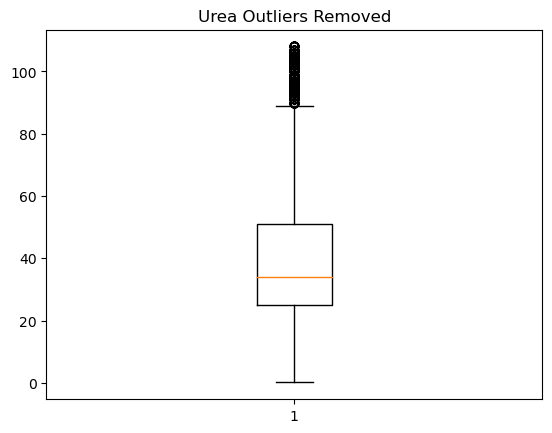

In [77]:
plt.boxplot(remove_outliers['UREA'])
plt.title('Urea Outliers Removed')

In [ ]:
x = patient['duration of intensive unit stay'].value_counts()
plt.pie(x.values,labels=x.index)
plt.show()

<Axes: xlabel='AGE', ylabel='OUTCOME'>

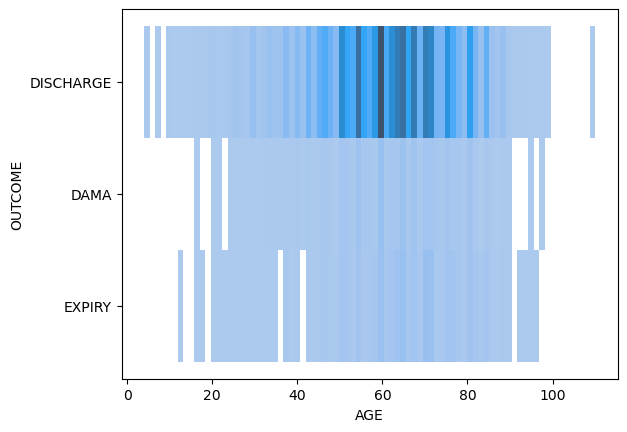

In [193]:
sns.histplot(x=patient['AGE'],y=patient['OUTCOME'],data=patient)

C:\Users\pvans\AppData\Local\Temp\ipykernel_13240\4264114461.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(patient['HTN'])


<Axes: xlabel='HTN', ylabel='Density'>

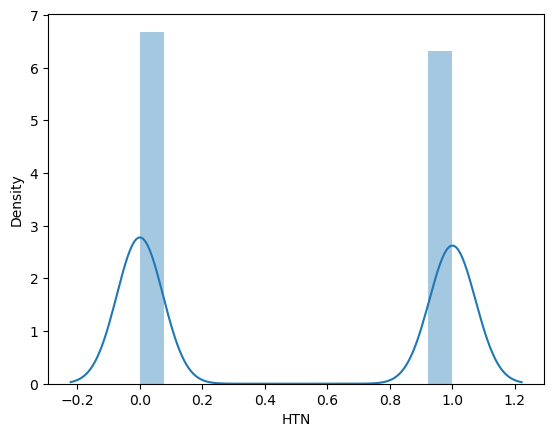

In [86]:
sns.distplot(patient['HTN'])

# Insight 1

<Axes: >

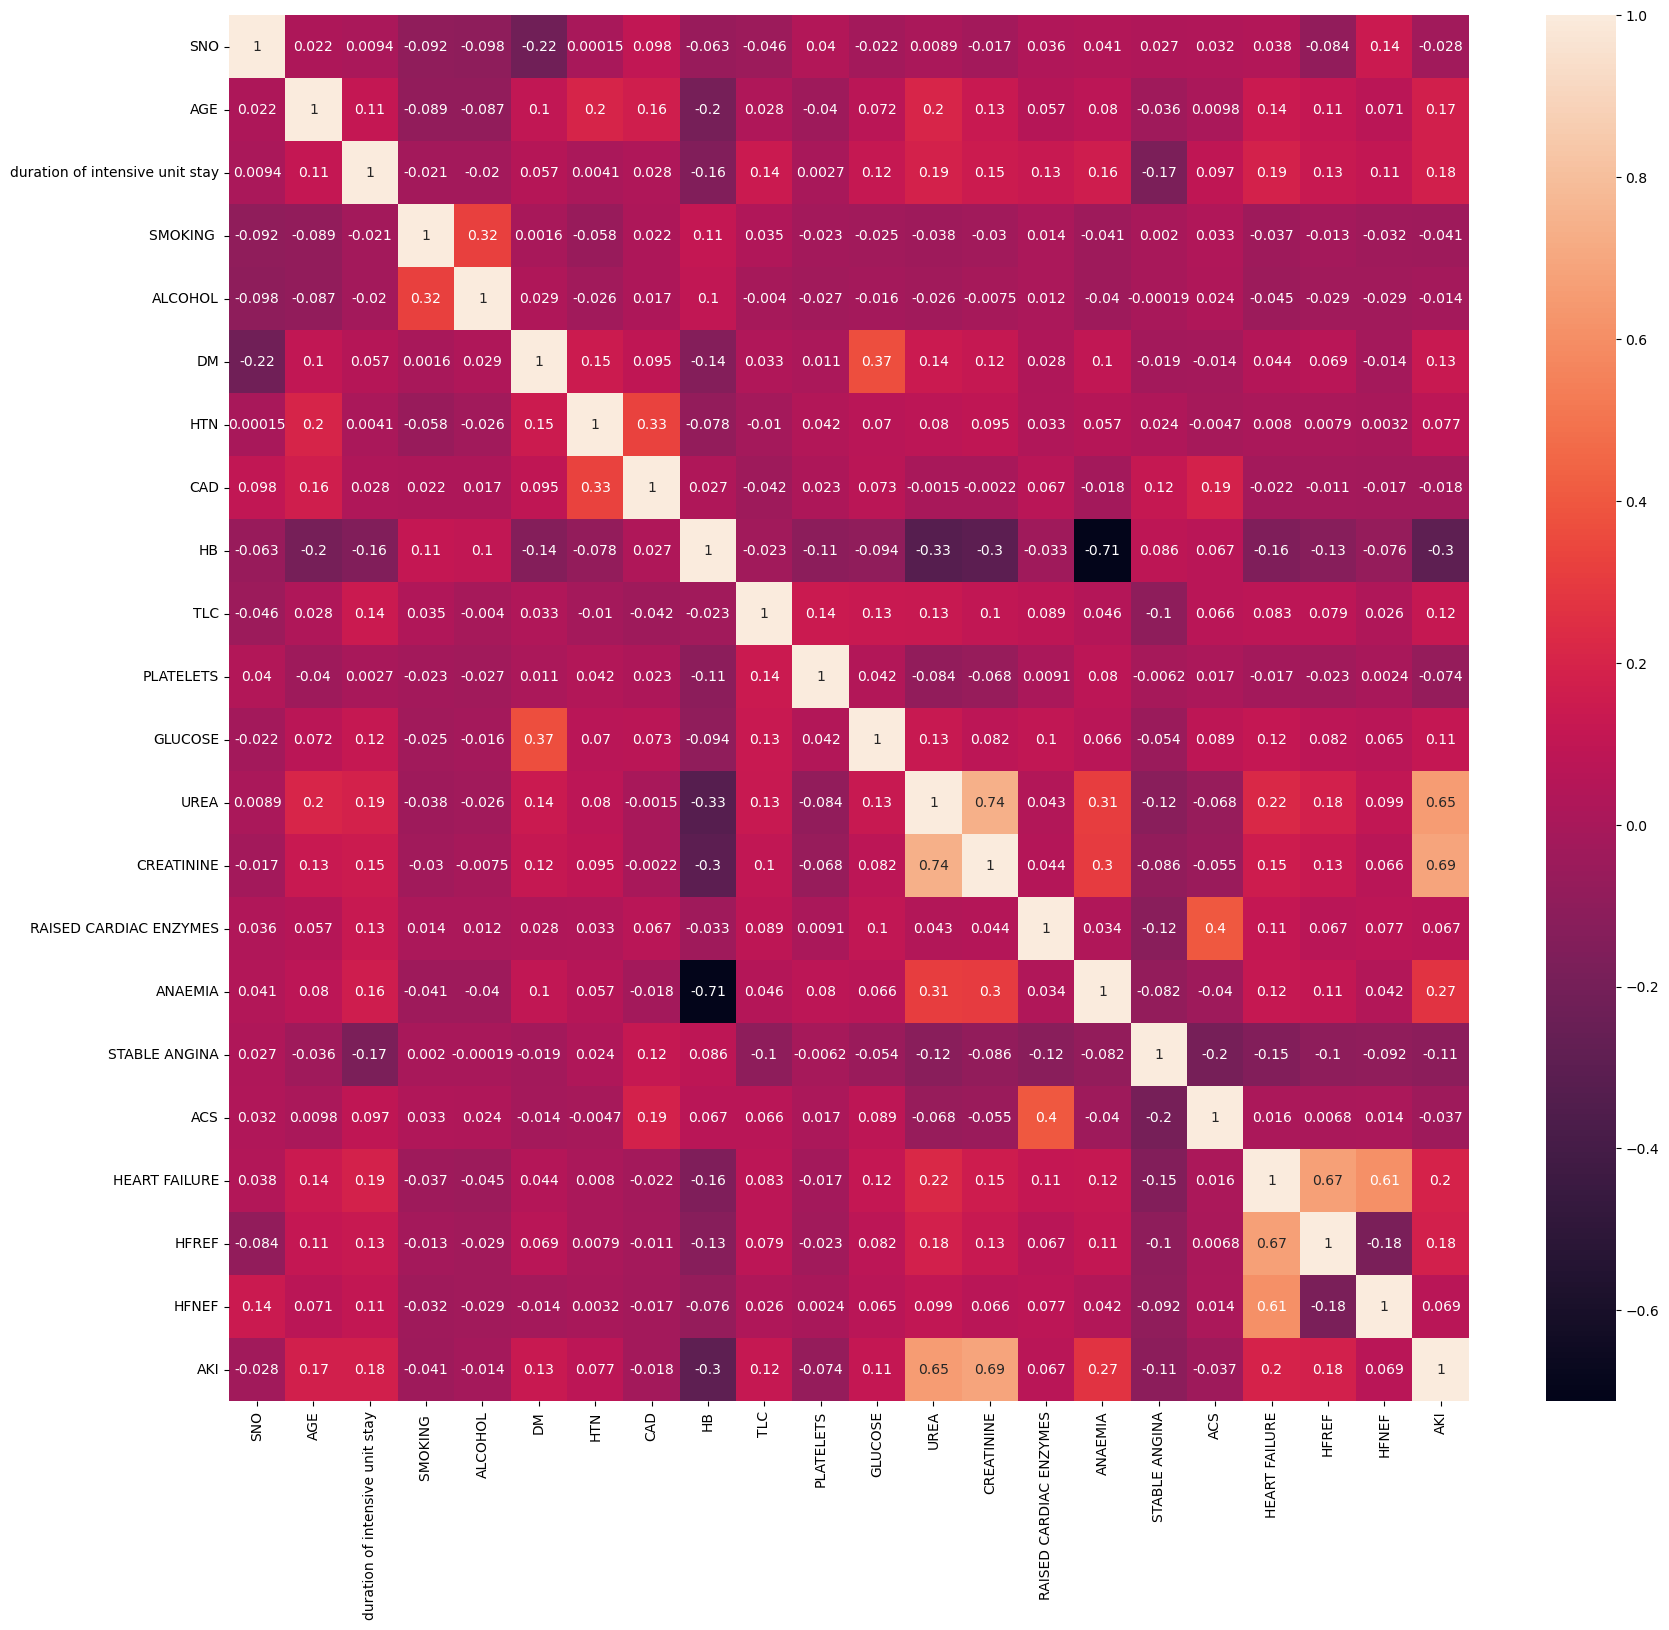

In [25]:
# identify patterns, correlations, and trends in dataset
plt.figure(figsize=(20, 18))
sns.heatmap(patient.corr(numeric_only=True) , annot = True )

# Insight 2

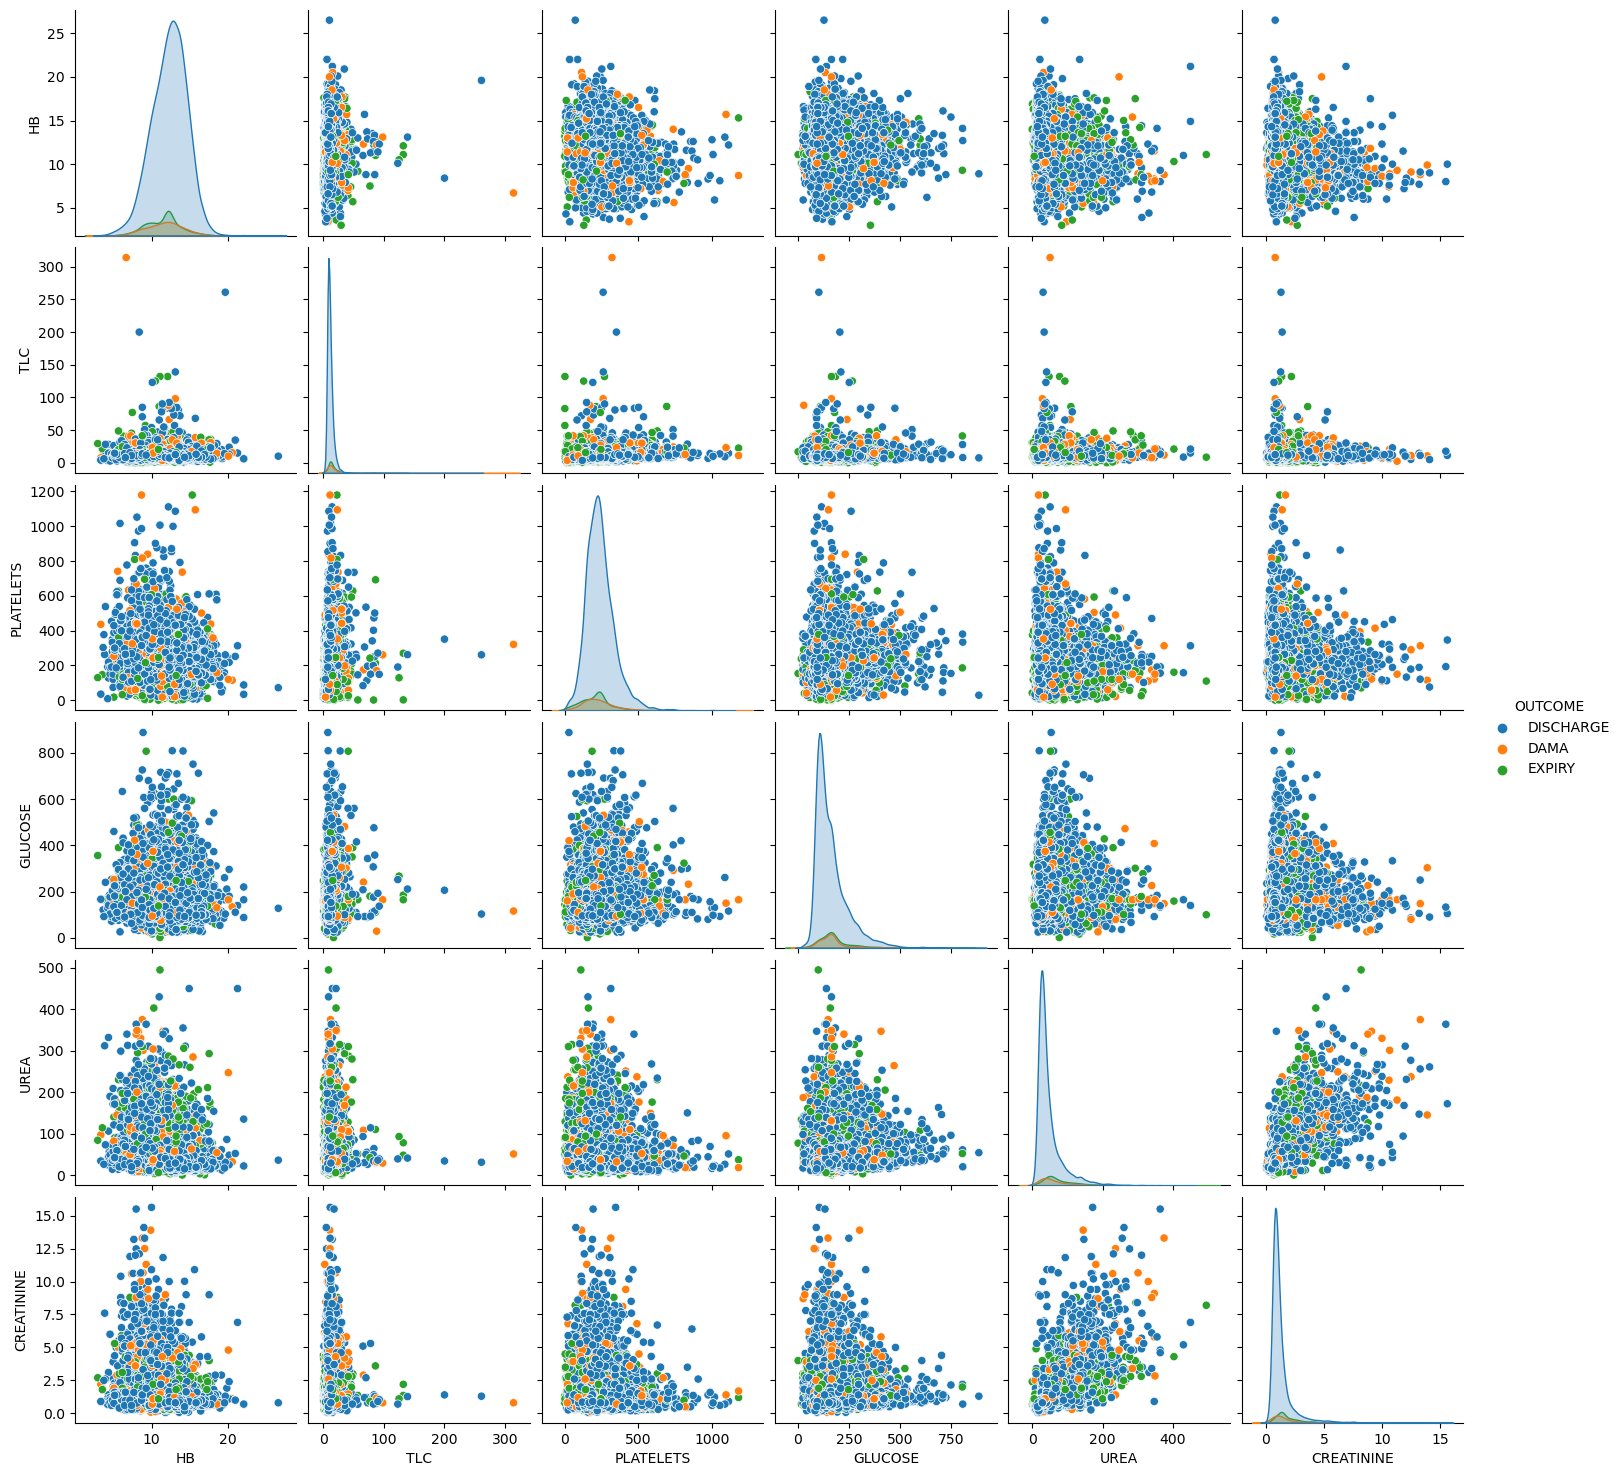

In [254]:
#can extract combinations 
#relationships between multiple numerical variables in a dataset(scatter,histogram)
# It's particularly useful during the exploratory data analysis (EDA) phase to quickly understand the interactions and correlations between multiple variables
tests = ['HB', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'OUTCOME']

# Create pairplots to visualize relationships between tests and 'OUTCOME'
sns.pairplot(patient[tests], hue='OUTCOME')
plt.show()

# Insight 3

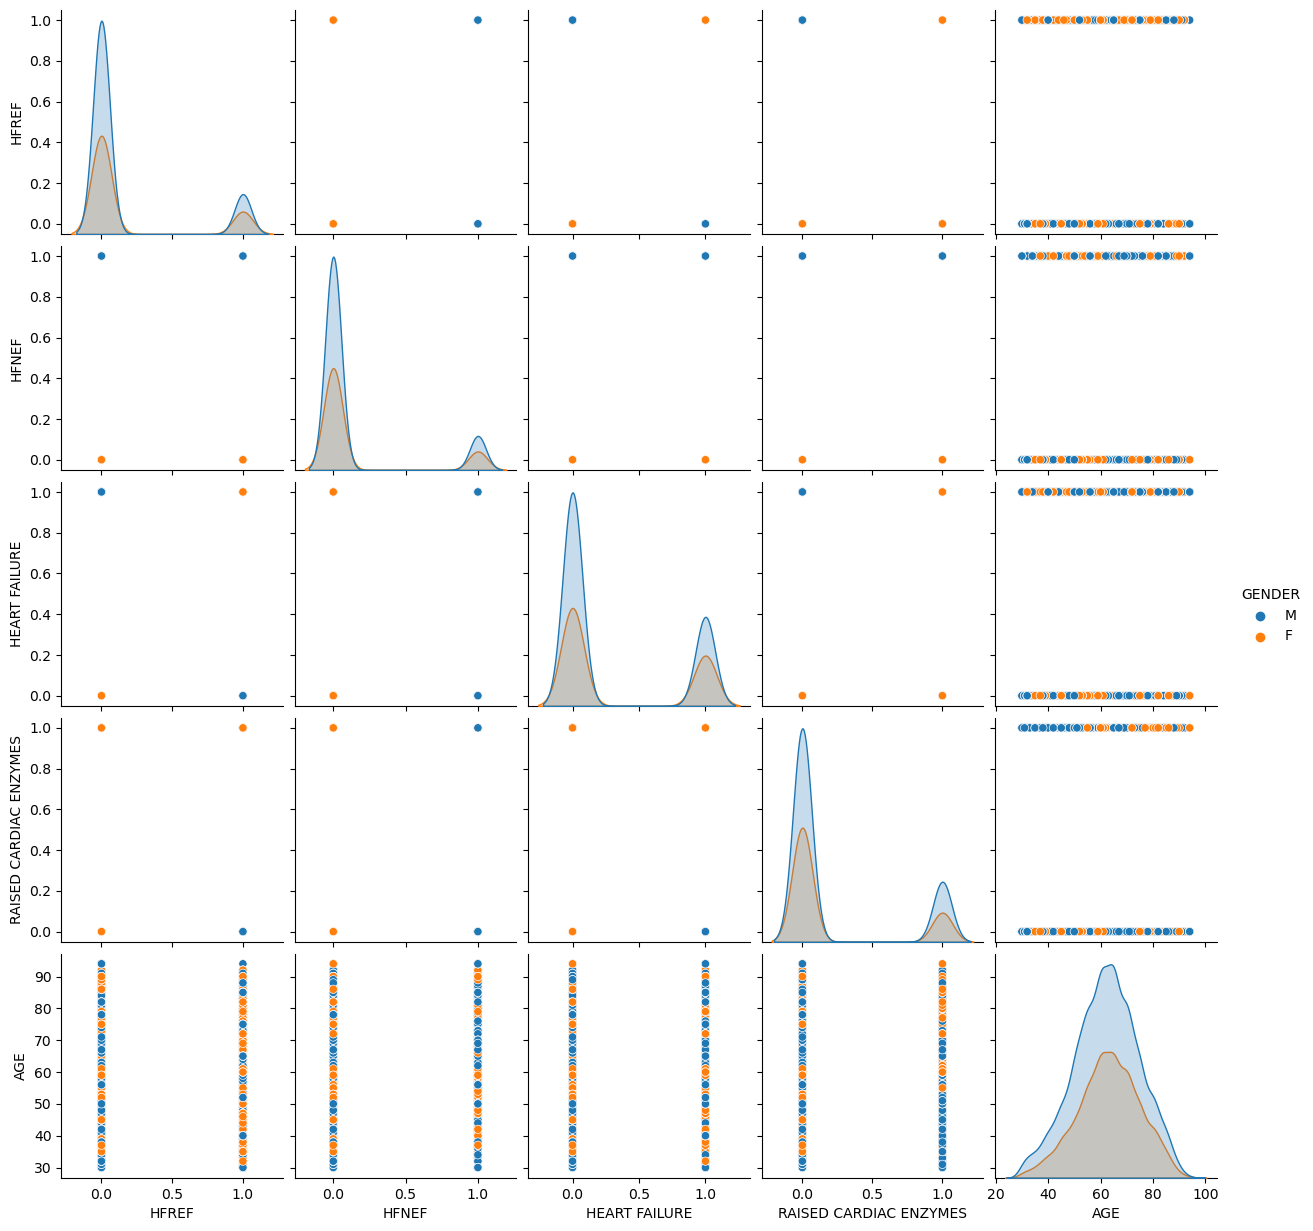

In [124]:
#HFREF: Heart Failure with Reduced Ejection Fraction
#HFNEF: Heart Failure with Preserved Ejection Fraction
Q1 = patient['AGE'].quantile(0.25)
Q3 = patient['AGE'].quantile(0.75)
IQR = Q3 - Q1
mini = Q1 - (1.5 * IQR)
maxi = Q3 + (1.5 * IQR)
remove_outlierstemp = patient[( patient['AGE']>= mini) & ( patient['AGE']<= maxi)]
mini,Q1,Q3,maxi,remove_outlierstemp

#sns.boxplot(x =remove_outlierstemp['AGE'], data = remove_outlierstemp)

heartfailure = ['HFREF', 'HFNEF','HEART FAILURE', 'RAISED CARDIAC ENZYMES','AGE','GENDER']

sns.pairplot(remove_outlierstemp[heartfailure], hue='GENDER')
plt.show()

# Insight 4

Text(0, 0.5, 'HB')

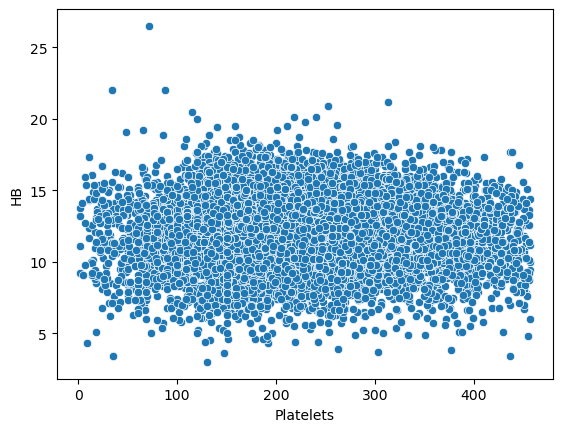

In [94]:
#platelets and hb will be used as fewer platelets,HB Drop
#fewer wbc more likely to get infection
#fewer platelets blood too thin
#donor platelets count-- lower hb higher platlets yeild after transplat in patient body
Q1 = patient['PLATELETS'].quantile(0.25)
Q3 = patient['PLATELETS'].quantile(0.75)
IQR = Q3 - Q1
mini = Q1 - (1.5 * IQR)
maxi = Q3 + (1.5 * IQR)
remove_outlierstemp = patient[( patient['PLATELETS']>= mini) & ( patient['PLATELETS']<= maxi)]
mini,Q1,Q3,maxi,remove_outlierstemp

sns.scatterplot(x=remove_outlierstemp['PLATELETS'].values,y=remove_outlierstemp['HB'].values)
plt.xlabel('Platelets')
plt.ylabel('HB')

<Axes: xlabel='AGE'>

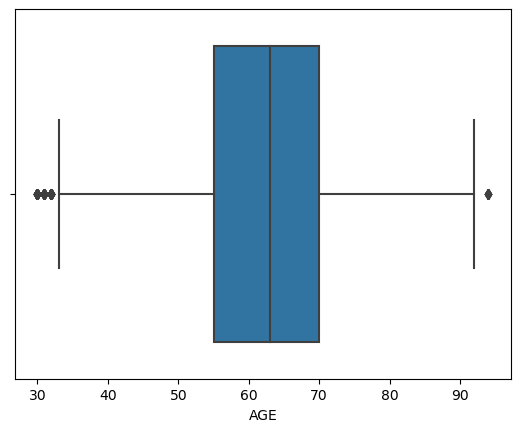

In [56]:
Q1 = patient['AGE'].quantile(0.25)
Q3 = patient['AGE'].quantile(0.75)
IQR = Q3 - Q1
mini = Q1 - (1.5 * IQR)
maxi = Q3 + (1.5 * IQR)
remove_outlierstemp = patient[( patient['AGE']>= mini) & ( patient['AGE']<= maxi)]
mini,Q1,Q3,maxi,remove_outlierstemp

sns.boxplot(x =remove_outlierstemp['AGE'], data = remove_outlierstemp)

C:\Users\pvans\AppData\Local\Temp\ipykernel_13240\2291870427.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =remove_outlierstemp['AGE'])#, data = remove_outlierstemp)


<Axes: ylabel='Density'>

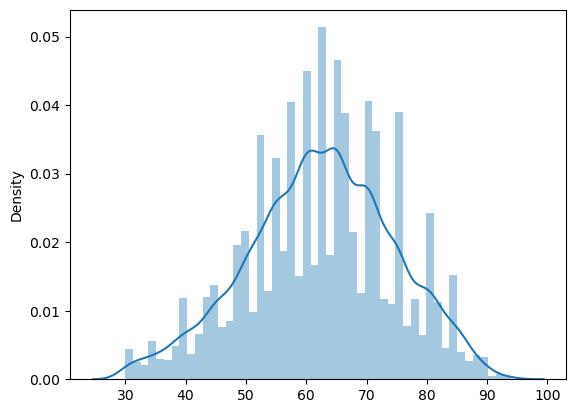

In [83]:
sns.distplot(x =remove_outlierstemp['AGE'])#, data = remove_outlierstemp)
#histogram along with an estimated probability density function curve

# Insight 5

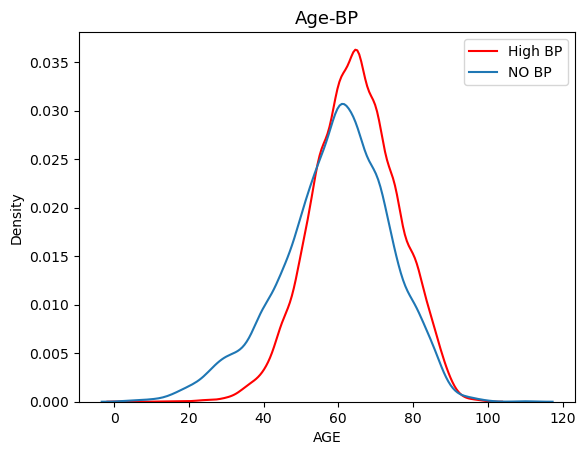

In [20]:
#kde-kernel density estimate  represents the data using a continuous probability density curve

#age effected with bp cad ......
#can perform same for anamia,stable anameia   HEART FAILURE......
plt.title('Age-BP',fontsize = 13)
sns.kdeplot(patient[patient['HTN'] == 1].AGE,label = 'High BP',color='r')
sns.kdeplot(patient[patient['HTN'] == 0].AGE,label = 'NO BP')
plt.legend()
plt.show()

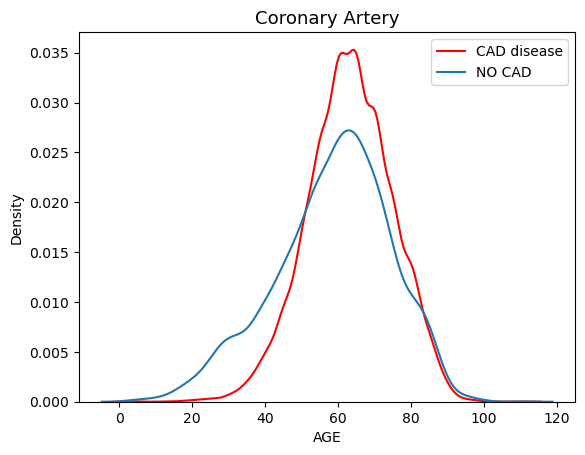

In [207]:
#similar can be carried out for ACS
plt.title('Coronary Artery',fontsize = 13)
sns.kdeplot(patient[patient['CAD'] == 1].AGE,label = 'CAD disease',color='r')
sns.kdeplot(patient[patient['CAD'] == 0].AGE,label = 'NO CAD')
plt.legend()
plt.show()

# Insight 6

<Axes: xlabel='UREA', ylabel='CREATININE'>

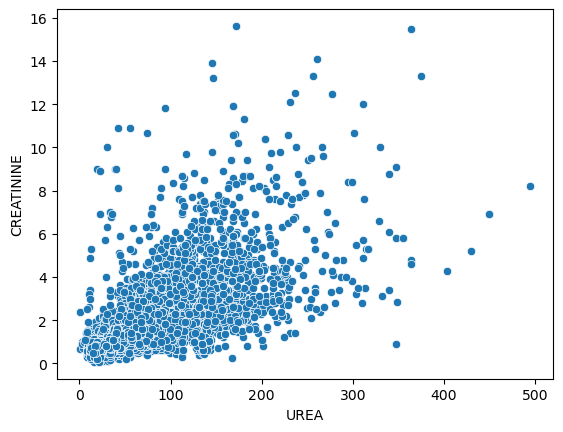

In [87]:
# the higher the BCR/UCR, the greater is the risk of worsening kidney malfunction condition and death
#bcr-creatinine  ucr-urea
#Identification of HeartFailure patients at highest risk of death involves assessment of renal function, and a number of recent studies suggest that calculation of patient BCR/UCR has important prognostic value.
sns.scatterplot(x=patient['UREA'],y=patient['CREATININE'])

<Axes: xlabel='UREA', ylabel='CREATININE'>

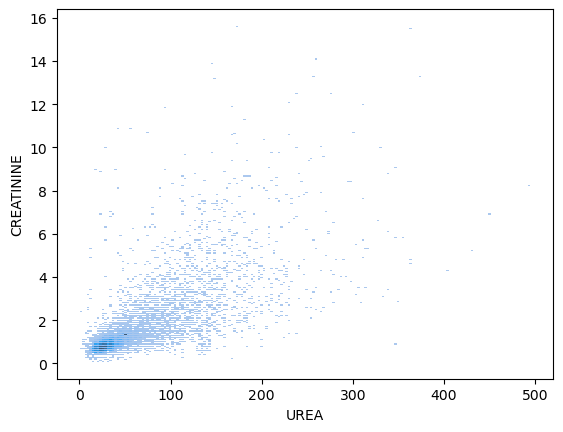

In [194]:
sns.histplot(x=patient['UREA'],y=patient['CREATININE'],data=patient)

# Insight 7

<Axes: xlabel='EF', ylabel='AGE'>

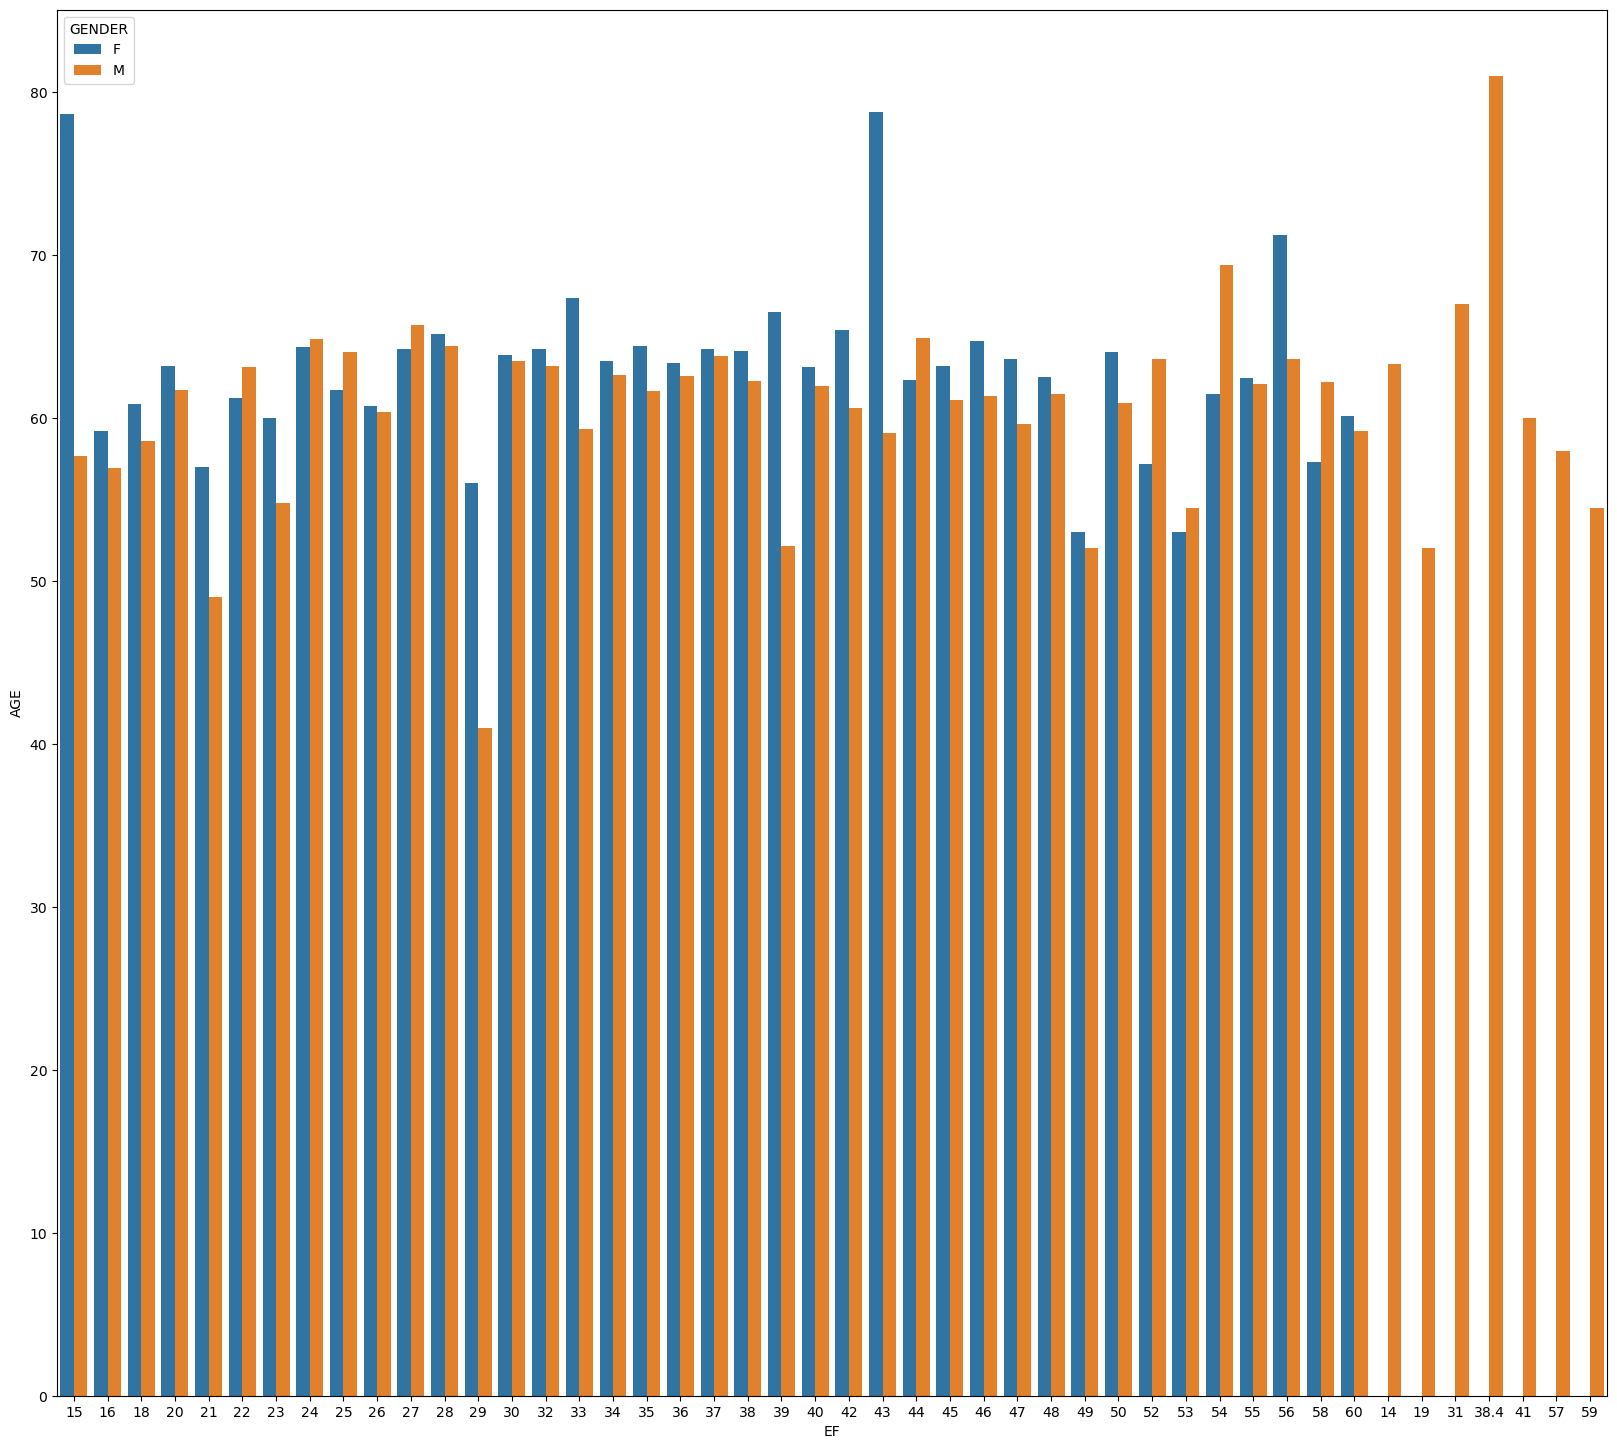

In [26]:
#The aging process is associated with significant changes in left and right ventricular EF in subjects with no cardiac functional and structural abnormalities.


plt.figure(figsize=(20, 18))
ana = patient.groupby(['GENDER', 'EF'])['AGE'].mean().reset_index()
sns.barplot(data=ana,x="EF", y="AGE", hue="GENDER")


In [127]:
patient.isnull().sum()

SNO                                0
D.O.A                              0
D.O.D                              1
AGE                                0
GENDER                             0
RURAL                              0
TYPE OF ADMISSION-EMERGENCY/OPD    0
month year                         0
duration of intensive unit stay    0
OUTCOME                            0
SMOKING                            0
ALCOHOL                            0
DM                                 0
HTN                                0
CAD                                0
HB                                 0
TLC                                0
PLATELETS                          0
GLUCOSE                            0
UREA                               0
CREATININE                         0
RAISED CARDIAC ENZYMES             0
EF                                 0
ANAEMIA                            0
STABLE ANGINA                      0
ACS                                0
HEART FAILURE                      0
H

# Insight 8

Text(0, 0.5, 'AKI/ACS')

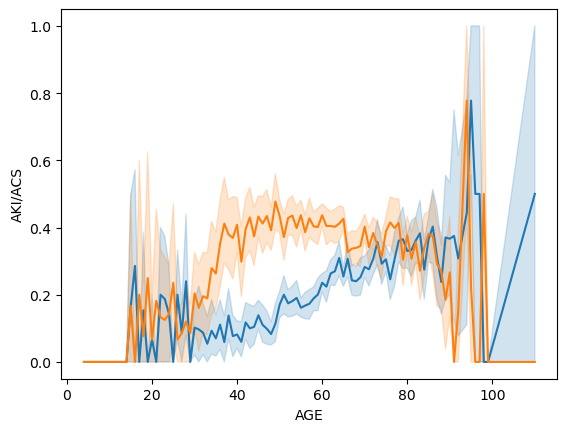

In [196]:
 #AKI is one of the complications of acute coronary syndrome (ACS)
sns.lineplot(x=patient['AGE'],y=patient['AKI'])
sns.lineplot(x=patient['AGE'],y=patient['ACS'])
plt.ylabel("AKI/ACS")


<Axes: xlabel='AGE'>

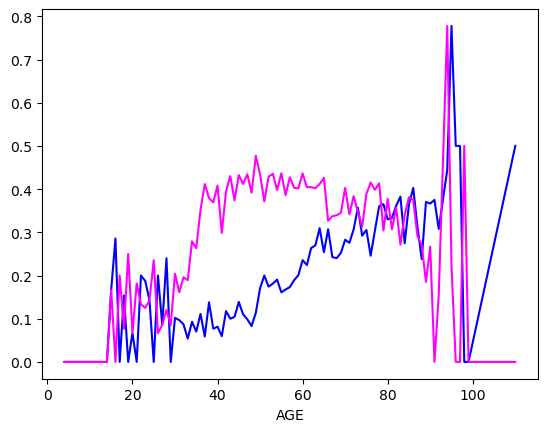

In [201]:
patient.groupby('AGE')['AKI'].mean().plot(color='blue',label='AKI')
patient.groupby('AGE')['ACS'].mean().plot(color='magenta',label='ACS')

# Insight 9

In [165]:
#Getting the longest stay ,age,doctor note,arrival date
patientstay= patient[(patient['AGE'] >= 40) & (patient['AGE'] <= 65)]#40,65 range of age between which we want to find  

longest = patientstay['duration of intensive unit stay'].max()#max stay from range of age


longest_stay = patientstay[patientstay['duration of intensive unit stay'] == longest]#max temp from all the years


print("stay:",longest)
print("age: ",longest_stay['AGE'].iloc[0])#Year: 19 87518    44 Name: YR, dtype: int64  if no iloc
print("note:",longest_stay['DOCTORS NOTE'].iloc[0])
print("arrival:",longest_stay['D.O.A_Formatted'].iloc[0])
print("arrival:",longest_stay['D.O.D_Formatted'].iloc[0])

stay: 48
age:  54
note: The patient Passed Away, We are sorry for your loss
arrival: 03 October 2018
arrival: 19 November 2018


# Insight 10

<Axes: xlabel='ALCOHOL', ylabel='DM'>

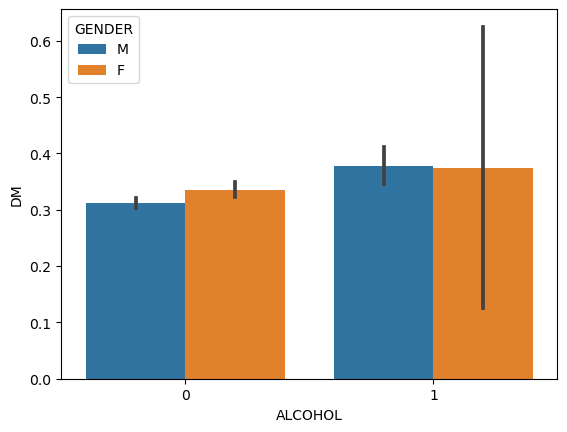

In [168]:
#Alcoholic drinks such as beer and sweetened mixed drinks are high in carbohydrates, which can raise blood sugar levels.
#how consumption of alcohol has impact on the Diabetes on male and female
sns.barplot(y=patient['DM'],x=patient['ALCOHOL'],hue=patient['GENDER'])


## Insight 11 

<Axes: xlabel='AGE'>

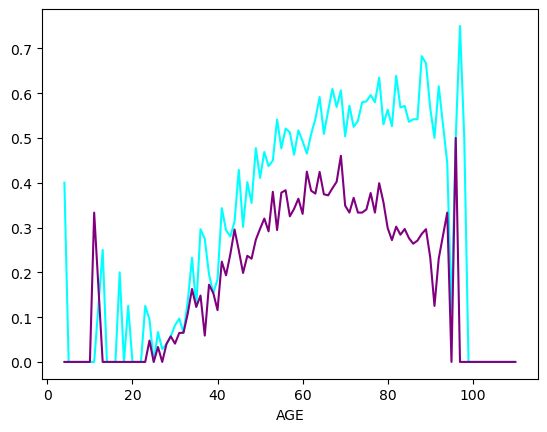

In [203]:
#The combined impact of diabetes and high blood pressure can increase the risk of cardiovascular disease, kidney disease, and other health issues.
patient.groupby('AGE')['HTN'].mean().plot(color='cyan',label='HTN')
patient.groupby('AGE')['DM'].mean().plot(color='purple',label='DM')

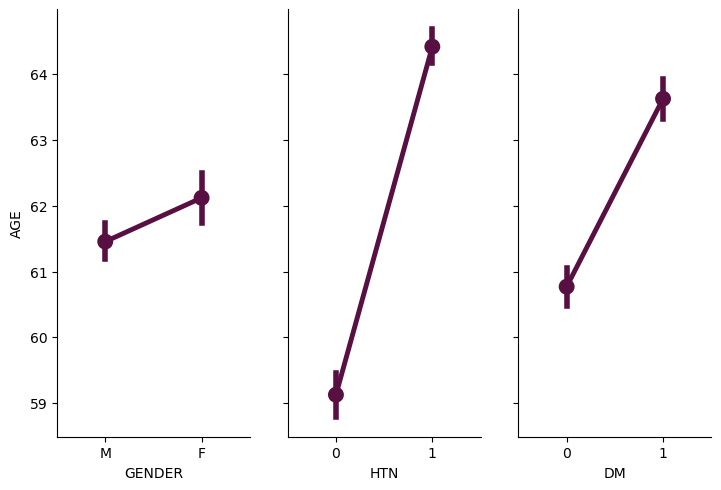

In [192]:
#A point plot represents an estimate of central tendency for a numeric variable by the position of the dot and provides some indication of the uncertainty around that estimate using error bars.
g=sns.PairGrid(patient, y_vars="AGE",x_vars=["GENDER",  "HTN", "DM"],height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")

# Encoding

In [30]:
encode_columns = ['GENDER', 'TYPE OF ADMISSION-EMERGENCY/OPD', 'OUTCOME','RURAL']
encoded_columns = pd.get_dummies(patient[encode_columns], prefix=encode_columns)
patient_encoded = pd.concat([patient, encoded_columns], axis=1)
print(patient_encoded)

         SNO      D.O.A      D.O.D  AGE GENDER RURAL  \
0          1 2017-04-01 2017-04-03   81      M     R   
1          2 2017-04-01 2017-04-05   65      M     R   
3       6880 2018-02-24 2018-02-24   53      M     U   
4       6974 2018-02-28 2018-03-03   53      M     U   
5       9509 2018-11-07 2018-07-13   54      M     U   
...      ...        ...        ...  ...    ...   ...   
15752  15753 2019-03-31 2019-04-04   86      F     U   
15753  15754 2019-03-31 2019-04-01   50      M     R   
15754  15755 2019-03-31 2019-09-04   82      M     U   
15755  15756 2019-03-31 2019-03-04   59      F     U   
15756  15757 2019-03-31 2019-03-04   59      F     U   

      TYPE OF ADMISSION-EMERGENCY/OPD month year  \
0                                   E     Apr-17   
1                                   E     Apr-17   
3                                   E     Feb-18   
4                                   E     Feb-18   
5                                   E     Jul-18   
...            

# Model Training

# LOGISTIC

In [327]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Y = np.array(patient['HEART FAILURE']).reshape(-1, 1)
#X = np.array(patient['AGE']).reshape(-1, 1)
X= patient.iloc[:, [17,25,26]].values#urea , hfref,hfnef

X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size = 0.20, random_state = 1)

model=LogisticRegression()
model.fit(X_train,Y_train.ravel())

predictions= np.array(model.predict(X_test))

from sklearn.metrics import accuracy_score,precision_score
accuracy = accuracy_score( predictions,Y_test)

print("Precision:"+"{:.3}".format(precision_score(Y_test, predictions)))
print("Accuracy: " + "{:.1%}".format(accuracy))

from sklearn.metrics import classification_report
report = classification_report(Y_test, predictions)
print(report)

from sklearn.metrics import confusion_matrix  
print(confusion_matrix(Y_test, predictions))

Precision:1.0
Accuracy: 100.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1905
           1       1.00      1.00      1.00       927

    accuracy                           1.00      2832
   macro avg       1.00      1.00      1.00      2832
weighted avg       1.00      1.00      1.00      2832

[[1905    0]
 [   0  927]]


# KNN

In [325]:
from sklearn.neighbors import KNeighborsClassifier 

Y = np.array(patient['HEART FAILURE']).reshape(-1, 1)
X= patient.iloc[:, [17,25,26]].values#urea , hfref,hfnef 
#X = np.array(patient['AGE']).reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

model= KNeighborsClassifier()  
model.fit(X_train, Y_train.ravel())

prediction=model.predict(X_test)

from sklearn.metrics import precision_score,accuracy_score

print("Precision:"+"{:.3}".format(precision_score(Y_test, prediction)))
accuracy_score=accuracy_score(prediction,Y_test)
print("Accuracy: " + "{:.1%}".format(accuracy_score))

from sklearn.metrics import confusion_matrix  
print(confusion_matrix(Y_test, prediction))  

Precision:0.986
Accuracy: 98.4%
[[1892   13]
 [  32  895]]


# Decision Tree

In [324]:
from sklearn.tree import DecisionTreeClassifier

Y = np.array(patient['HEART FAILURE']).reshape(-1, 1)
#X = np.array(patient['AGE']).reshape(-1, 1)
X= patient.iloc[:, [17,25,26]].values#urea , hfref,hfnef

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

   

model=DecisionTreeClassifier()
model.fit(X_train,Y_train)

prediction=model.predict(X_test)

from sklearn.metrics import precision_score,accuracy_score

print("Precision:"+"{:.3}".format(precision_score(Y_test, prediction)))
accuracy_score=accuracy_score(prediction,Y_test)
print("Accuracy: " + "{:.1%}".format(accuracy_score))

from sklearn.metrics import confusion_matrix  
print(confusion_matrix(Y_test,prediction))

Precision:1.0
Accuracy: 99.9%
[[1905    0]
 [   2  925]]


# Random Forest

In [323]:
from sklearn.ensemble import RandomForestClassifier  

Y = np.array(patient['HEART FAILURE']).reshape(-1, 1)
#X = np.array(patient['AGE']).reshape(-1, 1)
X= patient.iloc[:, [17,25,26]].values#urea , hfref,hfnef

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

model= RandomForestClassifier()  
model.fit(X_train, Y_train.ravel())

prediction=model.predict(X_test)

from sklearn.metrics import precision_score,accuracy_score

print("Precision:"+"{:.3}".format(precision_score(Y_test, prediction)))
accuracy_score=accuracy_score(prediction,Y_test)
print("Accuracy: " + "{:.1%}".format(accuracy_score))

from sklearn.metrics import confusion_matrix  
print(confusion_matrix(Y_test, prediction))

Precision:1.0
Accuracy: 99.9%
[[1905    0]
 [   2  925]]


# Naive Bayes

In [322]:
from sklearn.naive_bayes import GaussianNB  

Y = np.array(patient['HEART FAILURE']).reshape(-1, 1)
#X = np.array(patient['AGE']).reshape(-1, 1)
X= patient.iloc[:, [17,25,26]].values#urea , hfref,hfnef

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

model = GaussianNB()  
model.fit(X_train, Y_train.ravel()) 

prediction=model.predict(X_test)

from sklearn.metrics import precision_score,accuracy_score


accuracy_score=accuracy_score(prediction,Y_test)
print("Accuracy: " + "{:.1%}".format(accuracy_score))
print("Precision:"+"{:.3}".format(precision_score(Y_test, prediction)))

print(confusion_matrix(Y_test,prediction))

Accuracy: 99.6%
Precision:0.988
[[1894   11]
 [   0  927]]


# SVM

In [321]:
from sklearn.svm import SVC

Y = np.array(patient['HEART FAILURE']).reshape(-1, 1)
#X = np.array(patient['AGE']).reshape(-1, 1)
X= patient.iloc[:, [17,25,26]].values#urea , hfref,hfnef

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

model= SVC()  
model.fit(X_train, Y_train.ravel())

prediction=model.predict(X_test)

from sklearn.metrics import precision_score,accuracy_score

print("Precision:"+"{:.3f}".format(precision_score(Y_test, prediction)))
accuracy_score=accuracy_score(prediction,Y_test)
print("Accuracy: " + "{:.1%}".format(accuracy_score))

from sklearn.metrics import confusion_matrix  
print(confusion_matrix(Y_test, prediction)) 

Precision:0.557
Accuracy: 67.5%
[[1874   31]
 [ 888   39]]
